# MINERÍA DE DATOS
## LABORATORIO SEMANA 13
### DOCENTE:  Dr. Hugo David Calderon Vilca
### INTEGRANTES:
- Blas Ruiz, Luis Aaron - 19200069
- Huarhuachi Ortega, Andrea Mariana - 19200267
- Ramos Rivas, Kevin Keyler - 19200096
- Rojas Villanueva, Paula Elianne - 19200266
- Torres Talaverano, Luz Elena - 19200294

# Análisis Exploratorio de Datos

## Descripción de la Segunda Parte

En este paso procedemos a visualizar los datos y comprobar si lo que esta en el texto tiene sentido (coherencia). 

Para ello, vamos a encontrar algunos patrones con EDA antes de identificar los patrones ocultos con técnicas de aprendizaje automático (ML). 

A continuación, vamos a considerar lo siguiente en cada capítulo:

- **Palabras más comunes:** Encontrarlas y crear nubes de palabras
- **Tamaño del vocabulario:** Ver el número de palabras únicas
- **Cantidad de blasfemias** Términos más comunes

## Palabras más comunes

### Realizar su análisis

In [16]:
# Leer la matriz documento-término
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,T1C1,T1C2,T1C3,T1C4,T1C5,T1C6,T1C7,T1C8
abandoned,1,0,0,0,1,0,0,0
abilities,0,0,1,0,1,0,0,0
ability,0,1,1,1,1,2,0,1
ablaze,0,0,1,0,0,0,0,0
able,0,1,2,1,0,1,1,1


In [17]:
# Encontrar las 30 palabras con mayor repitencia en cada capítulo
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'T1C1': [('wednesday', 32),
  ('im', 32),
  ('dont', 25),
  ('youre', 24),
  ('nevermore', 23),
  ('know', 18),
  ('school', 17),
  ('like', 17),
  ('did', 15),
  ('just', 15),
  ('going', 13),
  ('way', 13),
  ('want', 13),
  ('right', 12),
  ('oh', 12),
  ('mother', 12),
  ('ive', 12),
  ('thing', 12),
  ('little', 11),
  ('got', 11),
  ('people', 11),
  ('tell', 11),
  ('need', 11),
  ('rowan', 10),
  ('love', 10),
  ('time', 10),
  ('thats', 9),
  ('gonna', 9),
  ('girl', 8),
  ('okay', 8)],
 'T1C2': [('im', 28),
  ('wednesday', 26),
  ('like', 22),
  ('dont', 18),
  ('know', 17),
  ('just', 17),
  ('rowan', 17),
  ('youre', 13),
  ('thing', 13),
  ('come', 12),
  ('poe', 11),
  ('cup', 11),
  ('want', 11),
  ('need', 11),
  ('ive', 10),
  ('think', 10),
  ('good', 9),
  ('scales', 9),
  ('bianca', 9),
  ('right', 8),
  ('monster', 8),
  ('sheriff', 8),
  ('weems', 8),
  ('hes', 8),
  ('tell', 8),
  ('got', 8),
  ('yeah', 7),
  ('lets', 7),
  ('mother', 7),
  ('didnt', 7)],
 'T1C3

In [18]:
# Imprimir las 15 palabras más dichas por cada capítulo
for chapter, top_words in top_dict.items():
    print(chapter)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

T1C1
wednesday, im, dont, youre, nevermore, know, school, like, did, just, going, way, want, right
---
T1C2
im, wednesday, like, dont, know, just, rowan, youre, thing, come, poe, cup, want, need
---
T1C3
know, im, dont, crackstone, youre, like, just, want, wednesday, monster, yeah, hey, joseph, think
---
T1C4
im, wednesday, like, dont, come, know, dance, just, thats, going, raven, eugene, got, youre
---
T1C5
garrett, wednesday, dont, father, im, know, did, right, got, mother, gates, like, didnt, want
---
T1C6
know, like, just, wednesday, dont, youre, want, im, oh, birthday, right, gates, think, need
---
T1C7
im, know, just, wednesday, hyde, dont, like, need, right, ill, monster, youve, thing, diary
---
T1C8
wednesday, tyler, im, youre, weems, know, dont, hyde, thing, just, thats, nevermore, time, got
---


En este punto podríamos continuar y crear directamente las nubes de palabras. Sin embargo, al observar estas palabras principales, podemos ver que algunas de ellas tienen muy poco significado y podrían añadirse a una lista de palabras de parada, así que vamos a hacerlo.

In [19]:
# Ver las palabras más comunes, para ello se añade aWord stop en la lista de palabras
from collections import Counter

# Sacamos las 30 palabras principales de cada capítulo
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[chapter]]
    for t in top:
        words.append(t)
        
words

['wednesday',
 'tyler',
 'im',
 'youre',
 'weems',
 'know',
 'dont',
 'hyde',
 'thing',
 'just',
 'thats',
 'nevermore',
 'time',
 'got',
 'xavier',
 'wait',
 'eugene',
 'come',
 'okay',
 'didnt',
 'right',
 'going',
 'crackstone',
 'mother',
 'whats',
 'school',
 'gates',
 'outcasts',
 'ive',
 'monster',
 'wednesday',
 'tyler',
 'im',
 'youre',
 'weems',
 'know',
 'dont',
 'hyde',
 'thing',
 'just',
 'thats',
 'nevermore',
 'time',
 'got',
 'xavier',
 'wait',
 'eugene',
 'come',
 'okay',
 'didnt',
 'right',
 'going',
 'crackstone',
 'mother',
 'whats',
 'school',
 'gates',
 'outcasts',
 'ive',
 'monster',
 'wednesday',
 'tyler',
 'im',
 'youre',
 'weems',
 'know',
 'dont',
 'hyde',
 'thing',
 'just',
 'thats',
 'nevermore',
 'time',
 'got',
 'xavier',
 'wait',
 'eugene',
 'come',
 'okay',
 'didnt',
 'right',
 'going',
 'crackstone',
 'mother',
 'whats',
 'school',
 'gates',
 'outcasts',
 'ive',
 'monster',
 'wednesday',
 'tyler',
 'im',
 'youre',
 'weems',
 'know',
 'dont',
 'hyde',
 

In [20]:
# Agreguemos esta lista e identifiquemos las palabras más comunes junto con el número de rutinas en las que aparecen
Counter(words).most_common()

[('wednesday', 8),
 ('tyler', 8),
 ('im', 8),
 ('youre', 8),
 ('weems', 8),
 ('know', 8),
 ('dont', 8),
 ('hyde', 8),
 ('thing', 8),
 ('just', 8),
 ('thats', 8),
 ('nevermore', 8),
 ('time', 8),
 ('got', 8),
 ('xavier', 8),
 ('wait', 8),
 ('eugene', 8),
 ('come', 8),
 ('okay', 8),
 ('didnt', 8),
 ('right', 8),
 ('going', 8),
 ('crackstone', 8),
 ('mother', 8),
 ('whats', 8),
 ('school', 8),
 ('gates', 8),
 ('outcasts', 8),
 ('ive', 8),
 ('monster', 8)]

In [21]:
# Si más de la mitad de los capítulos la tienen como palabra principal, exclúyela de la lista
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['wednesday',
 'tyler',
 'im',
 'youre',
 'weems',
 'know',
 'dont',
 'hyde',
 'thing',
 'just',
 'thats',
 'nevermore',
 'time',
 'got',
 'xavier',
 'wait',
 'eugene',
 'come',
 'okay',
 'didnt',
 'right',
 'going',
 'crackstone',
 'mother',
 'whats',
 'school',
 'gates',
 'outcasts',
 'ive',
 'monster']

In [22]:
# Actualizamos nuestra matriz documento-término con la nueva lista de stop words (palabras reservadas)
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
# Realizamos las nubes de palabras
# Recuerda que en el Terminal de Anaconda Prompt colocar el comando: python -m pip install wordcloud / conda install -c conda-forge wordcloud 
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

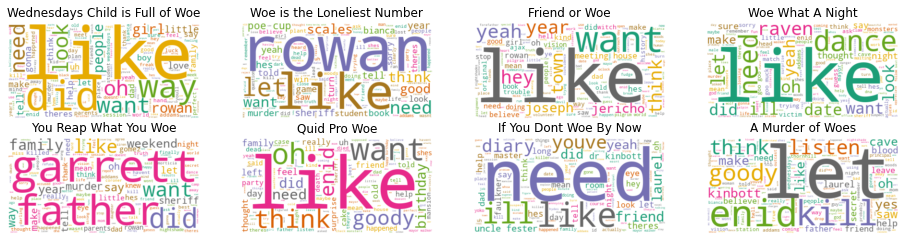

In [24]:
# Restablecer las dimensiones de salida
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_chapter = ['Wednesdays Child is Full of Woe', 'Woe is the Loneliest Number', 
                'Friend or Woe', 'Woe What A Night', 
                'You Reap What You Woe', 'Quid Pro Woe', 
                'If You Dont Woe By Now','A Murder of Woes']

# Crear subplots para cada capítulo
for index, chapter in enumerate(data.columns):
    wc.generate(data_clean.transcript[chapter])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_chapter[index])
    
plt.show()

### Resultados

- Vemos que tanto en el capítulo 1, capítulo 3, capítulo 4, capítulo 6 la palabra que más se repite es "like". También se repite en el capítulo 7 aquella palabra pero en segundo lugar.

## Número de palabras

### Análisis

In [25]:
# Hallar el número de palabras únicas que se dice en cada capítulo cada comediante.

# Identificamos los elementos distintos de cero en la matriz documento-término, lo que significa que la palabra aparece al menos una vez.

unique_list = []
for chapter in data.columns:
    uniques = data[chapter].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Crear un nuevo dataframe que contenga este recuento único de palabras
data_words = pd.DataFrame(list(zip(full_chapter, unique_list)), columns=['chapter', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,chapter,unique_words
7,A Murder of Woes,931
5,Quid Pro Woe,945
3,Woe What A Night,1058
6,If You Dont Woe By Now,1074
1,Woe is the Loneliest Number,1136
2,Friend or Woe,1159
4,You Reap What You Woe,1190
0,Wednesdays Child is Full of Woe,1348


In [26]:
# Calcular las palabras por minuto de cada capítulo

# Hallar el número total de palabras que se dice en un capítulo
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Tiempos de ejecución especiales de cada capítulo de Merlina, en minutos (buscar en internet la duración en minutos de cada capitulo, son 8 capitulos)
run_times = [59, 49, 48, 50, 52, 50, 47, 52]

# Añadimos algunas columnas a nuestra dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Ordenamos los datos por palabras por minuto para ver quién habla más lento y más rápido
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,chapter,unique_words,total_words,run_times,words_per_minute
7,A Murder of Woes,931,1778,52,34.192308
5,Quid Pro Woe,945,1802,50,36.040000
3,Woe What A Night,1058,1988,50,39.760000
6,If You Dont Woe By Now,1074,1951,47,41.510638
0,Wednesdays Child is Full of Woe,1348,2488,59,42.169492
4,You Reap What You Woe,1190,2214,52,42.576923
1,Woe is the Loneliest Number,1136,2091,49,42.673469
2,Friend or Woe,1159,2085,48,43.437500


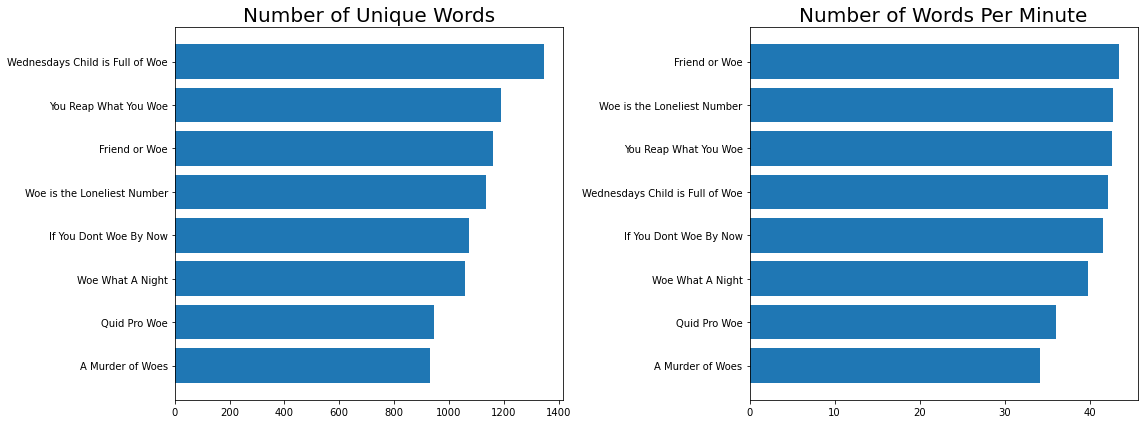

In [27]:
# Grafiquemos nuestros hallazgos
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.chapter)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.chapter)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Resultados

* **Vocabulario**
   * Wednesdays Child is Full of Woe (Capítulo 1) y You Reap What You Woe (Capitulo 5) usan muchas palabras en su capítulo
   * Quid Pro Woe (Capítulo 6) y A Murder of Woes (Capítulo 8) tienen un vocabulario más pequeño


* **Velocidad de conversación**
   * Friend or Woe (Capítulo 3) y Woe is the Loneliest Number (Capítulo 2) hablan rápido
   * BQuid Pro Woe (Capítulo 6) y A Murder of Woes (Capítulo 8) hablan lento

## Cantidad de palabras positivas

### Analysis

In [28]:
# Echemos un vistazo a las palabras más comunes de nuevo.
Counter(words).most_common()

[('wednesday', 8),
 ('tyler', 8),
 ('im', 8),
 ('youre', 8),
 ('weems', 8),
 ('know', 8),
 ('dont', 8),
 ('hyde', 8),
 ('thing', 8),
 ('just', 8),
 ('thats', 8),
 ('nevermore', 8),
 ('time', 8),
 ('got', 8),
 ('xavier', 8),
 ('wait', 8),
 ('eugene', 8),
 ('come', 8),
 ('okay', 8),
 ('didnt', 8),
 ('right', 8),
 ('going', 8),
 ('crackstone', 8),
 ('mother', 8),
 ('whats', 8),
 ('school', 8),
 ('gates', 8),
 ('outcasts', 8),
 ('ive', 8),
 ('monster', 8)]

In [29]:
# Aislemos solo palabras positivas
data_positive_words = data.transpose()[['like', 'family', 'friend']]
data_positive = pd.concat([data_positive_words.like, data_positive_words.family + data_positive_words.friend], axis=1)
data_positive.columns = ['like_word', 'family_friend_word']
data_positive

,like_word,family_friend_word
T1C1,17,6
T1C2,22,3
T1C3,18,2
T1C4,21,1
T1C5,13,13
T1C6,23,10
T1C7,17,7
T1C8,7,7


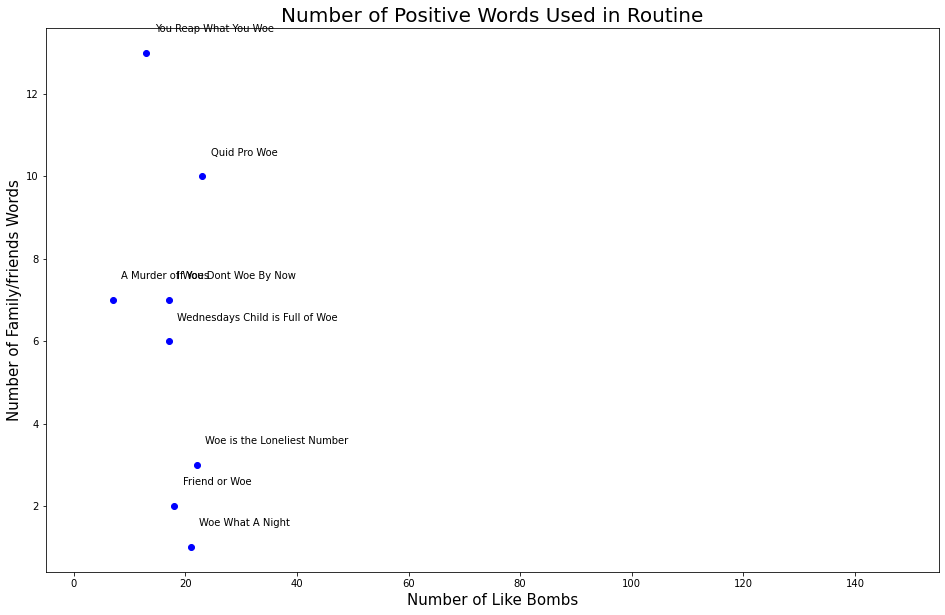

In [30]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [16, 10]

for i, comedian in enumerate(data_positive.index):
    x = data_positive.like_word.loc[comedian]
    y = data_positive.family_friend_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_chapter[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Positive Words Used in Routine', fontsize=20)
plt.xlabel('Number of Like Bombs', fontsize=15)
plt.ylabel('Number of Family/friends Words', fontsize=15)

plt.show()

### Resultados

* **Promedio Like-Bombs por minuto!** - A Murder of Woes (Capítulo 8) tiene mas palabras con contexto de familia y amigos

* **Clean Humor** - ser un buen predictor del tipo de capítulo que me gusta.